### Machine Learning Engineer Nanodegree


## Capstone Project
## Vision-Perception Module - Situational Awareness System for Autonomous Vehicles
## 01 - Dataset Preparation & Exploration

Kamil Kaczmarczyk
September 10th, 2017
***

## Import & Initialize

In [1]:
### Import the libraries

import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pickle
import os
import time
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from scipy.ndimage.measurements import label
from scipy.misc import imresize
import tensorflow as tf

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import codecs

%matplotlib inline

print("END")

END


## Import & Explore Dataset (run only once) 

Aspect Ration Aircraft Dataset overview:
Max = 1.2147458840372227
Mean = 0.6150137943977471
Min = 0.21052631578947367
Length = 400


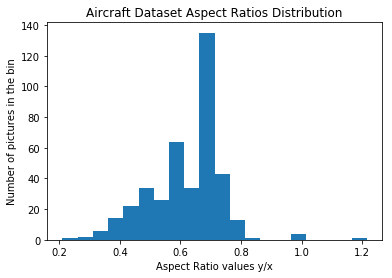

In [7]:
#process images
basedir = 'dataset_v2/aircraft/'
countAircraft=0
aspectRatioAir=[]
for infile in glob.glob(basedir+'/*'):
    file, ext = os.path.splitext(infile)
    imAir = cv2.imread(infile)
    aspectRatioAir.append(float(imAir.shape[0])/imAir.shape[1])
    countAircraft+=1
    
print("Aspect Ration Aircraft Dataset overview:")
print("Max = {}".format(max(aspectRatioAir)))
print("Mean = {}".format(np.mean(aspectRatioAir)))
print("Min = {}".format(min(aspectRatioAir)))
print("Length = {}".format(len(aspectRatioAir)))
plt.figure(1)
plt.hist(aspectRatioAir, 20)
plt.title('Aircraft Dataset Aspect Ratios Distribution')
plt.xlabel('Aspect Ratio values y/x')
plt.ylabel('Number of pictures in the bin')
plt.savefig('dataset_exploration/Pics_AR_aircraft.jpg')
plt.show()

Aspect Ration Birds Dataset overview:
Max = 2.3684210526315788
Mean = 0.7304286011479112
Min = 0.35428571428571426
Length = 367


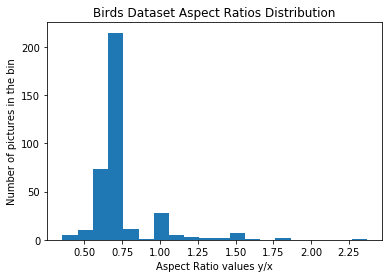

In [8]:
#process images
basedir = 'dataset_v2/birds/'
countBirds=0
aspectRatioBirds=[]
for infile in glob.glob(basedir+'/*'):
    file, ext = os.path.splitext(infile)
    imBirds = cv2.imread(infile)
    aspectRatioBirds.append(float(imBirds.shape[0])/imBirds.shape[1])
    countBirds+=1
    
print("Aspect Ration Birds Dataset overview:")
print("Max = {}".format(max(aspectRatioBirds)))
print("Mean = {}".format(np.mean(aspectRatioBirds)))
print("Min = {}".format(min(aspectRatioBirds)))
print("Length = {}".format(len(aspectRatioBirds)))
plt.figure(2)
plt.hist(aspectRatioBirds, 20)
plt.title('Birds Dataset Aspect Ratios Distribution')
plt.xlabel('Aspect Ratio values y/x')
plt.ylabel('Number of pictures in the bin')
plt.savefig('dataset_exploration/Pics_AR_birds.jpg')
plt.show()

In [ ]:
#process images
basedir = 'dataset_v2/sky/'
countSky=0
aspectRatioSky=[]
for infile in glob.glob(basedir+'/*'):
    file, ext = os.path.splitext(infile)
    imSky = cv2.imread(infile)
    aspectRatioSky.append(float(imSky.shape[0])/imSky.shape[1])
    countSky+=1
    
print("Aspect Ration Sky Dataset overview:")
print("Max = {}".format(max(aspectRatioSky)))
print("Mean = {}".format(np.mean(aspectRatioSky)))
print("Min = {}".format(min(aspectRatioSky)))
print("Length = {}".format(len(aspectRatioSky)))
plt.figure(3)
plt.hist(aspectRatioSky, 20)
plt.title('Sky Dataset Aspect Ratios Distribution')
plt.xlabel('Aspect Ratio values y/x')
plt.ylabel('Number of pictures in the bin')
plt.savefig('dataset_exploration/Pics_AR_sky.jpg')
plt.show()

In [ ]:
#process images
basedir = 'dataset_v2/ground/'
countGround=0
aspectRatioGround=[]
for infile in glob.glob(basedir+'/*'):
    file, ext = os.path.splitext(infile)
    imGround = cv2.imread(infile)
    aspectRatioGround.append(float(imGround.shape[0])/imGround.shape[1])
    countGround+=1
    
print("Aspect Ration Ground Dataset overview:")
print("Max = {}".format(max(aspectRatioGround)))
print("Mean = {}".format(np.mean(aspectRatioGround)))
print("Min = {}".format(min(aspectRatioGround)))
print("Length = {}".format(len(aspectRatioGround)))
plt.figure(4)
plt.hist(aspectRatioGround, 20)
plt.title('Ground Dataset Aspect Ratios Distribution')
plt.xlabel('Aspect Ratio values y/x')
plt.ylabel('Number of pictures in the bin')
plt.savefig('dataset_exploration/Pics_AR_ground.jpg')
plt.show()

## Rename Images (run only once)

In [3]:
# Rename Aircraft Pictures with IDs from 1 to N

basedir = 'dataset_v2/aircraft/'
targetdir = 'dataset_v2/aircraft_0/'
i=0
for infile in glob.glob(basedir+'/*'):
    
    file, ext = os.path.splitext(infile)
    im = cv2.imread(infile)
    cv2.imwrite(targetdir+"/" + str(i) + ".jpg", im)
    i+=1

In [4]:
# Rename Birds Pictures with IDs from 1 to N

basedir = 'dataset_v2/birds/'
targetdir = 'dataset_v2/birds_0/'
i=0
for infile in glob.glob(basedir+'/*'):
    
    file, ext = os.path.splitext(infile)
    im = cv2.imread(infile)
    cv2.imwrite(targetdir+"/" + str(i) + ".jpg", im)
    i+=1

In [5]:
# Rename Sky Pictures with IDs from 1 to N

basedir = 'dataset_v2/sky/'
targetdir = 'dataset_v2/sky_0/'
i=0
for infile in glob.glob(basedir+'/*'):
    
    file, ext = os.path.splitext(infile)
    im = cv2.imread(infile)
    cv2.imwrite(targetdir+"/" + str(i) + ".jpg", im)
    i+=1

In [6]:
# Rename Environent Pictures with IDs from 1 to N

basedir = 'dataset_v2/ground/'
targetdir = 'dataset_v2/ground_0/'
i=0
for infile in glob.glob(basedir+'/*'):
    
    file, ext = os.path.splitext(infile)
    im = cv2.imread(infile)
    cv2.imwrite(targetdir+"/" + str(i) + ".jpg", im)
    i+=1

In [58]:
# Rename Test Pictures with IDs from 1 to N

basedir = 'test_images/'
targetdir = 'test_images_0/'
i=0
for infile in glob.glob(basedir+'/*'):
    
    file, ext = os.path.splitext(infile)
    im = cv2.imread(infile)
    cv2.imwrite(targetdir+"/" + str(i) + ".jpg", im)
    i+=1

## Convert the Resolution Aspect Ratio of Images 

In [7]:
# Define the desired Aspect Ratio of pictures

desiredAspectRatio = 0.7
#imageX = 100
imageX = 300
imageY = int(imageX * desiredAspectRatio)

In [ ]:
# Resize Test Images to Desired Aspect Ratio

aspectRatioAir=[]
i=0
basedir = 'test_images_0/'
targetdir = 'test_images_1/'
for infile in glob.glob(basedir+'/*'):
    
    file, ext = os.path.splitext(infile)
    im = cv2.imread(infile)
    aspectRatioAir.append(float(im.shape[0])/im.shape[1])
    
    if aspectRatioAir[i]<desiredAspectRatio:
        r = imageY / im.shape[0]
        dim = (int(im.shape[1] * r), imageY)
        resized = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
        delta_x = abs(resized.shape[1]-imageX)/2
        cropped = resized[:,int(delta_x):int(resized.shape[1]-delta_x)]
    else:
        r = imageX / im.shape[1]
        dim = (imageX, int(im.shape[0] * r))
        resized = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
        delta_y = abs(resized.shape[0]-imageY)/2
        cropped = resized[int(delta_y):int(resized.shape[0]-delta_y),:]

    cv2.imwrite(targetdir+"/" + file + "_.jpg", cropped)
    i+=1
    #if i == 2:
    #    break

In [ ]:
# Resize Aircraft Images to Desired Aspect Ratio

aspectRatioAir=[]
i=0
basedir = 'dataset_v2/aircraft_0/'
targetdir = 'dataset_v2/aircraft_1/'
for infile in glob.glob(basedir+'/*'):
    
    file, ext = os.path.splitext(infile)
    im = cv2.imread(infile)
    aspectRatioAir.append(float(im.shape[0])/im.shape[1])
    
    if aspectRatioAir[i]<desiredAspectRatio:
        r = imageY / im.shape[0]
        dim = (int(im.shape[1] * r), imageY)
        resized = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
        delta_x = abs(resized.shape[1]-imageX)/2
        cropped = resized[:,int(delta_x):int(resized.shape[1]-delta_x)]
    else:
        r = imageX / im.shape[1]
        dim = (imageX, int(im.shape[0] * r))
        resized = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
        delta_y = abs(resized.shape[0]-imageY)/2
        cropped = resized[int(delta_y):int(resized.shape[0]-delta_y),:]

    cv2.imwrite(targetdir+"/" + file + "_.jpg", cropped)
    i+=1
    #if i == 2:
    #    break
    
print("done with aircraft pics resizing")

In [ ]:
# Resize Birds Images to Desired Aspect Ratio

aspectRatioBirds=[]
i=0
basedir = 'dataset_v2/birds_0/'
targetdir = 'dataset_v2/birds_1/'
for infile in glob.glob(basedir+'/*'):
    
    file, ext = os.path.splitext(infile)
    im = cv2.imread(infile)
    aspectRatioBirds.append(float(im.shape[0])/im.shape[1])
    
    if aspectRatioBirds[i]<desiredAspectRatio:
        r = imageY / im.shape[0]
        dim = (int(im.shape[1] * r), imageY)
        resized = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
        delta_x = abs(resized.shape[1]-imageX)/2
        cropped = resized[:,int(delta_x):int(resized.shape[1]-delta_x)]
    else:
        r = imageX / im.shape[1]
        dim = (imageX, int(im.shape[0] * r))
        resized = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
        delta_y = abs(resized.shape[0]-imageY)/2
        cropped = resized[int(delta_y):int(resized.shape[0]-delta_y),:]

    cv2.imwrite(targetdir+"/" + file + "_.jpg", cropped)
    i+=1
    
print("done with birds pics resizing")


In [ ]:
# Resize Sky Images to Desired Aspect Ratio

aspectRatioSky=[]
i=0
basedir = 'dataset_v2/sky_0/'
targetdir = 'dataset_v2/sky_1/'
for infile in glob.glob(basedir+'/*'):
    
    file, ext = os.path.splitext(infile)
    im = cv2.imread(infile)
    aspectRatioSky.append(float(im.shape[0])/im.shape[1])
    
    if aspectRatioSky[i]<desiredAspectRatio:
        r = imageY / im.shape[0]
        dim = (int(im.shape[1] * r), imageY)
        resized = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
        delta_x = abs(resized.shape[1]-imageX)/2
        cropped = resized[:,int(delta_x):int(resized.shape[1]-delta_x)]
    else:
        r = imageX / im.shape[1]
        dim = (imageX, int(im.shape[0] * r))
        resized = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
        delta_y = abs(resized.shape[0]-imageY)/2
        cropped = resized[int(delta_y):int(resized.shape[0]-delta_y),:]

    cv2.imwrite(targetdir+"/" + file + "_.jpg", cropped)
    i+=1
    
print("done with sky pics resizing")

In [ ]:
# Resize Ground Images to Desired Aspect Ratio

aspectRatioGround=[]
i=0
basedir = 'dataset_v2/ground_0/'
targetdir = 'dataset_v2/ground_1/'
for infile in glob.glob(basedir+'/*'):
    
    file, ext = os.path.splitext(infile)
    im = cv2.imread(infile)
    aspectRatioGround.append(float(im.shape[0])/im.shape[1])
    
    if aspectRatioGround[i]<desiredAspectRatio:
        r = imageY / im.shape[0]
        dim = (int(im.shape[1] * r), imageY)
        resized = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
        delta_x = abs(resized.shape[1]-imageX)/2
        cropped = resized[:,int(delta_x):int(resized.shape[1]-delta_x)]
    else:
        r = imageX / im.shape[1]
        dim = (imageX, int(im.shape[0] * r))
        resized = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
        delta_y = abs(resized.shape[0]-imageY)/2
        cropped = resized[int(delta_y):int(resized.shape[0]-delta_y),:]

    cv2.imwrite(targetdir+"/" + file + "_.jpg", cropped)
    i+=1
    
print("done with ground pics resizing")

## Save and summarize the final dataset

In [2]:
# Write Images Paths in files

#Aircraft images
basedir = 'dataset_v2/aircraft_1/'
aircraft = []
aircraft.extend(glob.glob(basedir+'/*'))
print('Number of aircraft images found: {}'.format(len(aircraft)))
with open("aircraft.txt", 'w') as f:
    for fn in aircraft:

        f.write(fn+'\n')
        
#Birds images
basedir = 'dataset_v2/birds_1/'
birds = []
birds.extend(glob.glob(basedir+'/*'))
print('Number of birds images found: {}'.format(len(birds)))
with open("birds.txt", 'w') as f:
    for fn in birds:
        f.write(fn+'\n')
        
#Sky images     
basedir = 'dataset_v2/sky_1/'
sky = []
sky.extend(glob.glob(basedir+'/*'))
print('Number of sky images found: {}'.format(len(sky)))
with open("sky.txt", 'w') as f:
    for fn in sky:
        f.write(fn+'\n')

#Ground images     
basedir = 'dataset_v2/ground_1/'
ground = []
ground.extend(glob.glob(basedir+'/*'))
print('Number of ground images found: {}'.format(len(ground)))
with open("ground.txt", 'w') as f:
    for fn in ground:
        f.write(fn+'\n')
        
print("END")

Number of aircraft images found: 400
Number of birds images found: 367
Number of sky images found: 407
Number of ground images found: 407
END


## Plot Sample of Images 

In [3]:
#plotting multiple images - based on the tutorial
def visualize(fig, rows, cols, imgs, titles):
    for i, img in enumerate(imgs):
        plt.subplot(rows, cols, i+1)
        plt.title(i+1)
        img_dims = len(img.shape)
        if img_dims < 3:
            plt.imshow(img, cmap='hot')
            plt.title(titles[i])
        else:
            plt.imshow(img)
            plt.title(titles[i])

In [4]:
#random indices selection
aircraft_ind = np.random.randint(0, len(aircraft))
birds_ind = np.random.randint(0, len(birds))
sky_ind = np.random.randint(0, len(sky))
ground_ind = np.random.randint(0, len(ground))

#read images
aircraft_image = mpimg.imread(aircraft[aircraft_ind])
birds_image = mpimg.imread(birds[birds_ind])
sky_image = mpimg.imread(sky[sky_ind])
ground_image = mpimg.imread(ground[ground_ind])

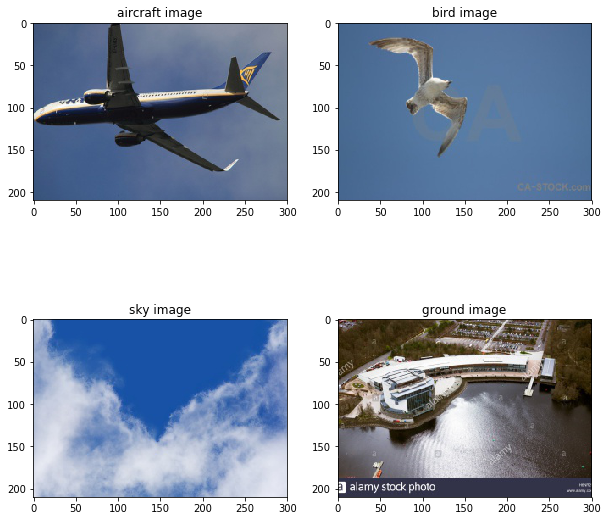

In [5]:
%matplotlib inline

images = [aircraft_image, birds_image, sky_image, ground_image]
titles = ['aircraft image', 'bird image', 'sky image', 'ground image']

fig = plt.figure(figsize=(10,10))
visualize(fig, 2, 2, images, titles)